In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [3]:
data_dir = r"C:\Users\ALPHA 15\Downloads\land_class_pro\EuroSAT"

In [4]:
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values between 0 and 1
    validation_split=0.2,  # Split 80% training, 20% validation
    horizontal_flip=True,  # Data augmentation: flip images
    zoom_range=0.2
)
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="training",
    class_mode="categorical"
)

Found 21600 images belonging to 10 classes.


In [5]:
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation",
    class_mode="categorical"
)

Found 5400 images belonging to 10 classes.


In [7]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(128, 128, 3)),  # Define input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_gen.class_indices), activation='softmax')  # Output layer
])

In [10]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Step 5: Train the Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

# Step 6: Save the Model
model.save("land_classification_model.h5")
print("Model saved as 'land_classification_model.h5'.")


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.3273 - loss: 1.7412

C:\Users\ALPHA 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


675/675 ━━━━━━━━━━━━━━━━━━━━ 314s 463ms/step - accuracy: 0.3275 - loss: 1.7408 - val_accuracy: 0.5887 - val_loss: 1.1350
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 169s 251ms/step - accuracy: 0.5896 - loss: 1.1387 - val_accuracy: 0.7137 - val_loss: 0.8114
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 163s 241ms/step - accuracy: 0.6766 - loss: 0.9120 - val_accuracy: 0.7165 - val_loss: 0.7726
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 164s 242ms/step - accuracy: 0.7234 - loss: 0.7894 - val_accuracy: 0.7559 - val_loss: 0.6605
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 163s 241ms/step - accuracy: 0.7521 - loss: 0.7090 - val_accuracy: 0.8074 - val_loss: 0.5711
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 163s 242ms/step - accuracy: 0.7700 - loss: 0.6691 - val_accuracy: 0.7517 - val_loss: 0.7042
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 163s 241ms/step - accuracy: 0.7796 - loss: 0.6448 - val_accuracy: 0.7935 - val_loss: 0.5768
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 164s 243ms/step - accuracy: 0.7923 - loss: 0.59

Model saved as 'land_classification_model.h5'.


In [9]:
!pip install scipy

   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
    --------------------------------------- 1.0/43.6 MB 6.3 MB/s eta 0:00:07
   - -------------------------------------- 1.8/43.6 MB 4.6 MB/s eta 0:00:10
   - -------------------------------------- 2.1/43.6 MB 4.5 MB/s eta 0:00:10
   --- ------------------------------------ 3.4/43.6 MB 4.1 MB/s eta 0:00:10
   --- ------------------------------------ 4.2/43.6 MB 4.2 MB/s eta 0:00:10
   ---- ----------------------------------- 5.0/43.6 MB 4.1 MB/s eta 0:00:10
   ----- ---------------------------------- 5.8/43.6 MB 4.1 MB/s eta 0:00:10
   ------ --------------------------------- 6.8/43.6 MB 4.0 MB/s eta 0:00:10
   ------ --------------------------------- 7.6/43.6 MB 4.0 MB/s eta 0:00:09
   ------- -------------------------------- 8.4/43.6 MB 4.0 MB/s eta 0:00:09
   -------- ------------------------------- 9.2/43.6 MB 4.0 MB/s eta 0:00:09
   --------- ------------------------------ 10.0/43.6 MB 4.0 MB/s eta 0:00:09
   --


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.8222 - loss: 0.5015
Validation Accuracy: 81.93%


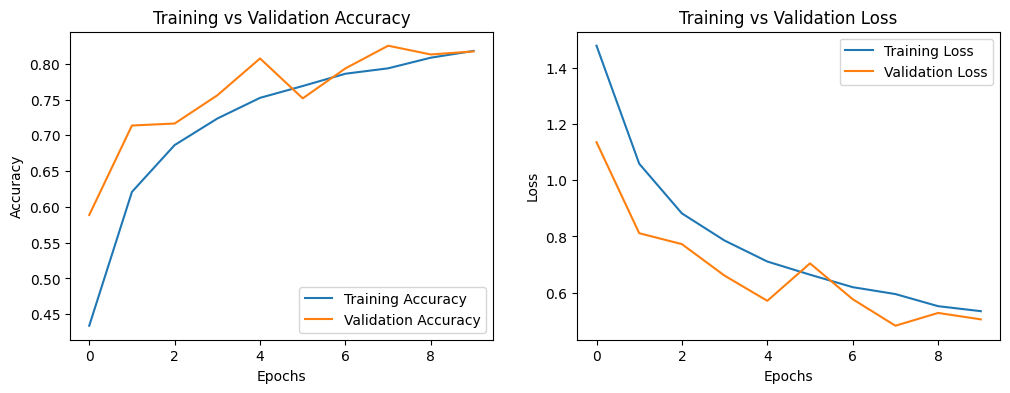

In [12]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [19]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to classify a single image
def classify_image(image_path, model, class_indices):
    """
    Predict the class of a given image using the trained model.
    
    Args:
        image_path (str): Path to the image file.
        model: Trained TensorFlow/Keras model.
        class_indices (dict): Mapping of class indices to class labels.

    Returns:
        str: Predicted class label.
    """
    # Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128))  # Resize image to model input size
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get the class index
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse class_indices mapping
    return class_labels[predicted_class]

# Load the trained model
model = tf.keras.models.load_model("land_classification_model.h5")

# Classify a new image
image_path = r"C:\Users\ALPHA 15\Downloads\land_class_pro\EuroSAT\SeaLake\SeaLake_968.jpg"  # Replace with the path to your test image
predicted_label = classify_image(image_path, model, train_gen.class_indices)
print(f"The classified land type is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
The classified land type is: SeaLake
